In [4]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
import pandas as pd 


In [7]:
feature_vector_length = 784
num_classes = 10

# # Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
x_train_reshaped = X_train.reshape(X_train.shape[0], feature_vector_length)
x_test_reshaped = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

img_rows, img_cols = 28, 28

input_shape = (img_rows, img_cols, 1)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(Y_train, num_classes)
y_test_binary = keras.utils.to_categorical(Y_test, num_classes)



In [58]:
print("train samples count: " ,  len(X_train))
print("test samples count: " ,  len(X_test))
print(type( X_train[15000]))

train samples count:  60000
test samples count:  10000
<class 'numpy.ndarray'>


visualize some images 

In [15]:

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(180, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))



Feature shape: (784,)


In [79]:

batch_size=300
epochs=20
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)
model.fit(x_train_reshaped, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
         validation_split=0.2)

Epoch 1/20
160/160 [==============================] - 2s 9ms/step - loss: 0.0757 - accuracy: 0.9766 - val_loss: 0.1223 - val_accuracy: 0.9676
Epoch 2/20
160/160 [==============================] - 1s 9ms/step - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.1317 - val_accuracy: 0.9657
Epoch 3/20
160/160 [==============================] - 1s 8ms/step - loss: 0.0744 - accuracy: 0.9775 - val_loss: 0.1260 - val_accuracy: 0.9670
Epoch 4/20
160/160 [==============================] - 1s 8ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.1178 - val_accuracy: 0.9671
Epoch 5/20
160/160 [==============================] - 1s 9ms/step - loss: 0.0729 - accuracy: 0.9776 - val_loss: 0.1157 - val_accuracy: 0.9668
Epoch 6/20
160/160 [==============================] - 1s 9ms/step - loss: 0.0832 - accuracy: 0.9742 - val_loss: 0.1297 - val_accuracy: 0.9630
Epoch 7/20
160/160 [==============================] - 1s 8ms/step - loss: 0.0810 - accuracy: 0.9749 - val_loss: 0.1289 - val_accuracy: 0.9632
Epoch 

In [84]:
# Test the model after training
test_results = model.evaluate(x_test_reshaped, y_test_binary , verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9667
Test results - Loss: 0.12125027924776077 - Accuracy: 0.96670001745224%


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# utility function for showing images
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

Predict the classes: 
1/1 [==============================] - 0s 16ms/step


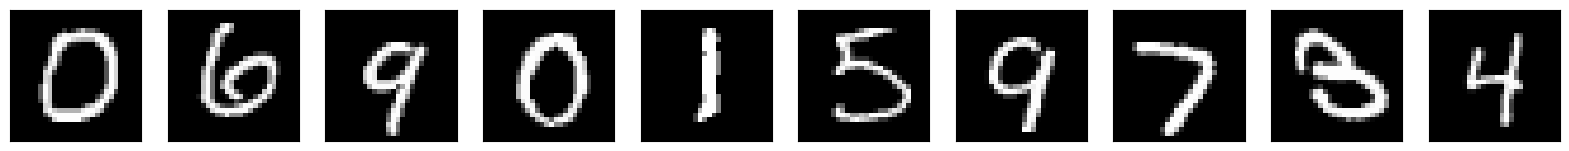

Predicted classes:  [0 6 9 0 1 5 9 7 3 4]


In [88]:
print('Predict the classes: ')
prediction=model.predict(x_test_reshaped[10:20]) 
classes_x=np.argmax(prediction,axis=1)
show_imgs(X_test[10:20])
print('Predicted classes: ', classes_x)

using croass validation 

In [21]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
xx = [ X_train , X_test]
yy =[ Y_train , Y_test]
X = np.concatenate ( xx)
Y= np.concatenate(yy)

test_part = []
accuracy = []
four_part_size = int(len( X)/4  )
data = X
goal_col = Y 
batch_size=300
epochs=20


for i in range(4) :
    print("i :" , i )
    test = data[i*four_part_size : (i+1)*four_part_size ]
    test_goal_col = goal_col[i*four_part_size : (i+1)*four_part_size ]
    if( i == 0 ) :
        train = data[(i+1)*four_part_size:]
        train_goal_col = goal_col[(i+1)*four_part_size:]
    elif ( i ==3 ) : 
        train = data[0:i*four_part_size]
        train_goal_col = goal_col[0:i*four_part_size]
    else :
        df1 = data[0 : i*four_part_size ]
        df2 = data[(i+1)*four_part_size :]
        train = np.concatenate( (df1 , df2) )
        df1 = goal_col[0 : i*four_part_size ]
        df2 = goal_col[(i+1)*four_part_size :]
        train_goal_col = np.concatenate((df1 , df2 ))
        
    x_train_reshaped = train.reshape(train.shape[0], feature_vector_length)
    x_test_reshaped = test.reshape(test.shape[0], feature_vector_length)

    print(x_test_reshaped.shape )
    train = train.astype('float32')
    test = test.astype('float32')
    train /= 255
    test /= 255

    y_train_binary = keras.utils.to_categorical(train_goal_col, num_classes)
    y_test_binary = keras.utils.to_categorical(test_goal_col, num_classes)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_reshaped, y_train_binary,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_split=0.2)
    test_results = model.evaluate(x_test_reshaped, y_test_binary , verbose=1)
    print(f'I: {i}% Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
    test_part.append(i) 
    accuracy.append( test_results[1] )


i : 0
(17500, 784)
Epoch 1/20
140/140 [==============================] - 3s 12ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.1181 - val_accuracy: 0.9704
Epoch 2/20
140/140 [==============================] - 1s 10ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.1250 - val_accuracy: 0.9685
Epoch 3/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.1326 - val_accuracy: 0.9657
Epoch 4/20
140/140 [==============================] - 1s 10ms/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.1124 - val_accuracy: 0.9682
Epoch 5/20
140/140 [==============================] - 1s 10ms/step - loss: 0.0599 - accuracy: 0.9795 - val_loss: 0.1217 - val_accuracy: 0.9657
Epoch 6/20
140/140 [==============================] - 2s 11ms/step - loss: 0.0603 - accuracy: 0.9807 - val_loss: 0.1086 - val_accuracy: 0.9669
Epoch 7/20
140/140 [==============================] - 2s 11ms/step - loss: 0.0591 - accuracy: 0.9813 - val_loss: 0.1308 - va

Test average Result : 0.968500018119812


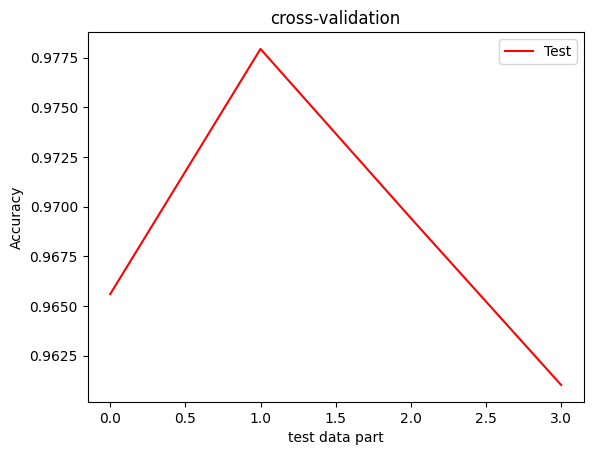

In [25]:
import matplotlib.pyplot as plt
test_accuracies = np.average( accuracy)
print( "Test average Result :" , np.average(test_accuracies ))

plt.plot( test_part,accuracy, color='r', label='Test')   
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("test data part") 
plt.ylabel("Accuracy") 
plt.title("cross-validation") 
plt.legend() 
plt.show() 